In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import  classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib

In [2]:
df =pd.read_csv("D:\Downloads\smartirrigation.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [4]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [6]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_0,2000.0,1.4370,1.321327,0.0,0.0,1.0,2.0,8.0
sensor_1,2000.0,1.6590,1.338512,0.0,1.0,1.0,2.0,9.0
sensor_2,2000.0,2.6545,1.699286,0.0,1.0,2.0,4.0,10.0
sensor_3,2000.0,2.6745,1.855875,0.0,1.0,2.0,4.0,11.0
sensor_4,2000.0,2.8875,1.816451,0.0,2.0,3.0,4.0,12.0
sensor_5,2000.0,1.4110,1.339394,0.0,0.0,1.0,2.0,7.0
sensor_6,2000.0,3.3155,2.206444,0.0,2.0,3.0,5.0,13.0
sensor_7,2000.0,4.2015,2.280241,0.0,3.0,4.0,6.0,12.0
sensor_8,2000.0,1.2140,1.386782,0.0,0.0,1.0,2.0,8.0
sensor_9,2000.0,1.9010,1.518668,0.0,1.0,2.0,3.0,9.0


In [9]:
x=df.iloc[:,0:20]
y=df.iloc[:,20:]

In [10]:
x.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
507,0.0,2.0,6.0,5.0,4.0,1.0,6.0,4.0,0.0,2.0,4.0,5.0,5.0,3.0,4.0,2.0,2.0,1.0,1.0,0.0
1900,0.0,0.0,1.0,2.0,2.0,0.0,1.0,5.0,1.0,2.0,7.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,1.0,0.0
771,0.0,0.0,3.0,1.0,1.0,0.0,5.0,5.0,3.0,2.0,2.0,4.0,8.0,2.0,2.0,1.0,4.0,0.0,0.0,5.0
1954,0.0,1.0,3.0,5.0,1.0,1.0,4.0,5.0,1.0,1.0,2.0,4.0,6.0,2.0,3.0,2.0,2.0,0.0,1.0,2.0
583,2.0,1.0,1.0,3.0,5.0,1.0,3.0,6.0,2.0,2.0,4.0,5.0,3.0,3.0,6.0,1.0,1.0,2.0,0.0,0.0
11,2.0,1.0,0.0,4.0,2.0,1.0,0.0,5.0,1.0,2.0,0.0,4.0,2.0,9.0,3.0,3.0,1.0,1.0,1.0,1.0
1662,1.0,2.0,0.0,0.0,3.0,1.0,9.0,5.0,0.0,2.0,0.0,3.0,9.0,4.0,2.0,2.0,1.0,4.0,1.0,1.0
192,0.0,1.0,1.0,5.0,0.0,1.0,5.0,4.0,0.0,2.0,3.0,5.0,5.0,4.0,1.0,0.0,2.0,0.0,3.0,0.0
753,0.0,0.0,2.0,6.0,1.0,0.0,4.0,4.0,0.0,4.0,4.0,7.0,5.0,9.0,5.0,1.0,0.0,0.0,3.0,3.0
912,2.0,0.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,0.0,0.0,4.0,2.0,3.0,3.0,4.0


In [11]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
1783,1,1,0
350,1,1,0
1441,0,1,0
1071,1,1,1
1025,1,1,0
1607,1,1,0
1741,1,0,0
1931,1,1,0
214,0,1,0
1481,0,1,0


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [13]:
x.shape,y.shape

((2000, 20), (2000, 3))

In [14]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
rf=RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
model=MultiOutputClassifier(rf)
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [20]:
y_pred=model.predict(x_test)
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=y.columns))

Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



C:\Users\preet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\preet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\preet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
print(df[['parcel_0','parcel_1','parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


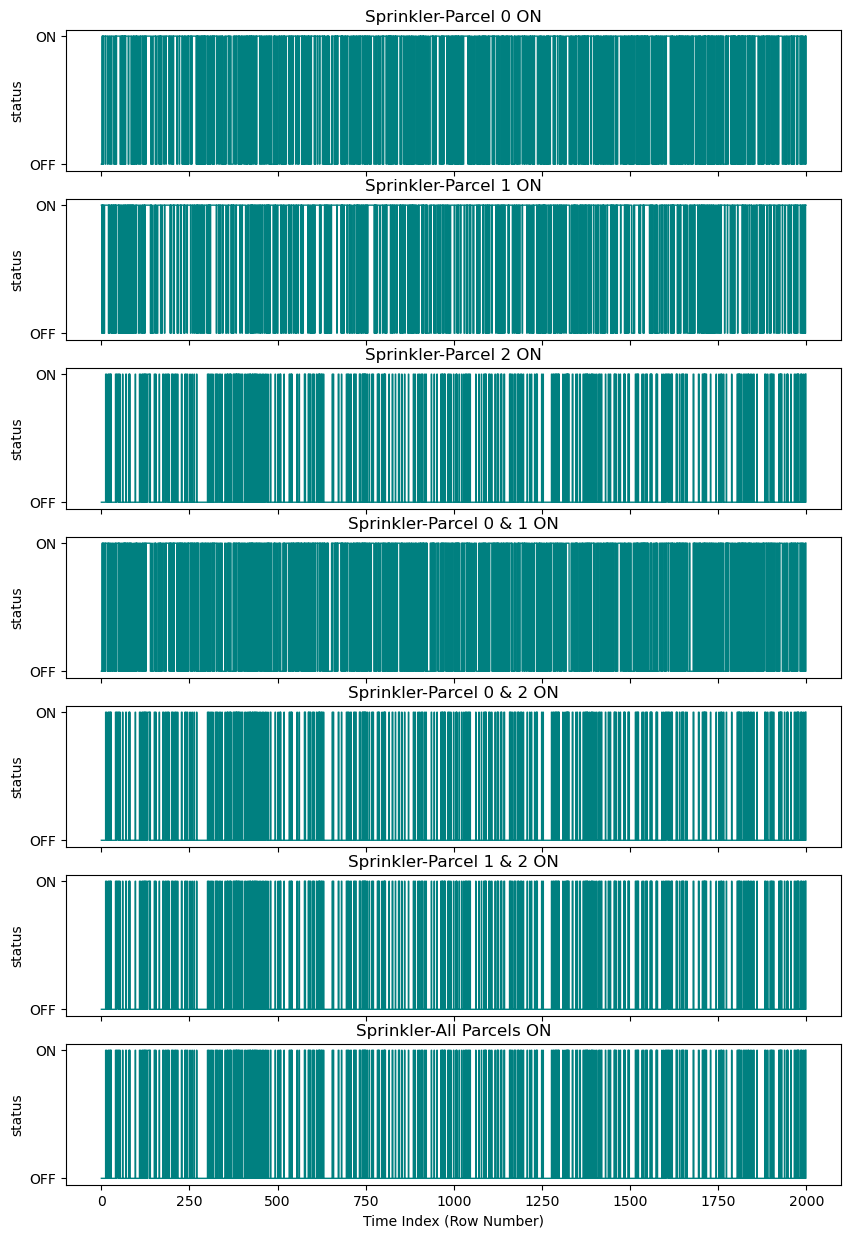

In [22]:
import matplotlib.pyplot as plt
conditions={
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON":df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}
fig, axs=plt.subplots(nrows=len(conditions), figsize=(10,15),sharex=True)
for ax, (title,condition) in zip(axs,conditions.items()):
    ax.step(df.index, condition.astype(int), where='post',linewidth=1,color='teal')
    ax.set_title(f"Sprinkler-{title}")
    ax.set_ylabel("status")
    ax.set_yticks([0,1])
    ax.set_yticklabels(['OFF','ON'])
axs[-1].set_xlabel("Time Index (Row Number)")
plt.show()


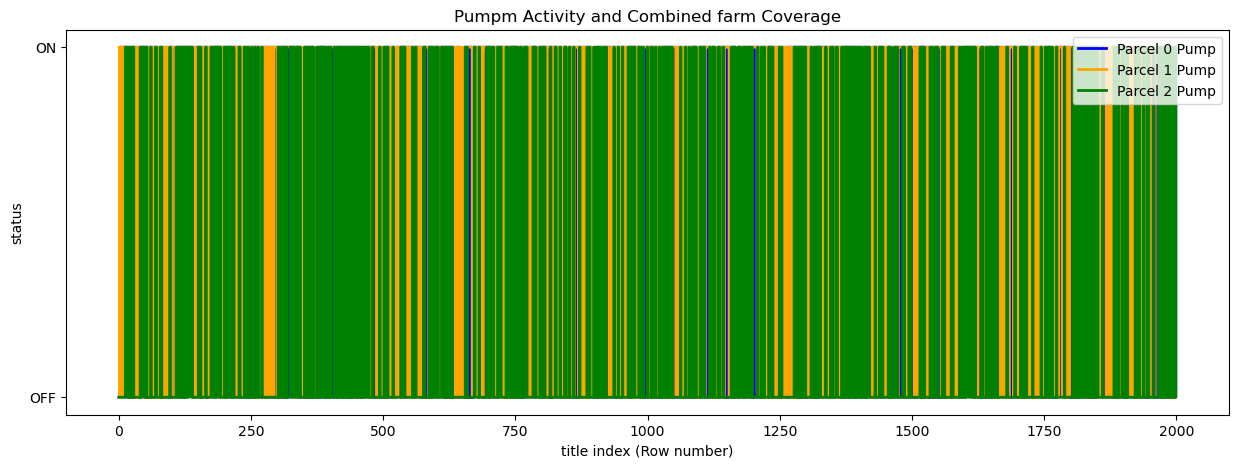

In [23]:
any_pump_on=(df['parcel_0'] ==1) | (df['parcel_1']==1) | (df['parcel_2']==1)
plt.figure(figsize=(15,5))
plt.step(df.index, df['parcel_0'],where='post', linewidth=2,label='Parcel 0 Pump',color='blue')
plt.step(df.index, df['parcel_1'],where='post', linewidth=2,label='Parcel 1 Pump',color='orange')
plt.step(df.index, df['parcel_2'],where='post', linewidth=2,label='Parcel 2 Pump',color='green')
plt.title("Pumpm Activity and Combined farm Coverage")
plt.xlabel("title index (Row number)")
plt.ylabel("status")
plt.yticks([0,1],['OFF','ON'])
plt.legend(loc='upper right')
plt.show()

In [24]:
import joblib
from sklearn.pipeline import Pipeline
joblib.dump(model, "Farm_irrigation_system.pkl")


['Farm_irrigation_system.pkl']